**Abstract:**

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv", delimiter=';')

df = pd.read_csv("bank-additional-full.csv", delimiter=";")


#I like to keep a copy of the original df to do some EDA
df_og = df.copy()

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#description = pd.read_table("/kaggle/input/bank-marketing/bank-additional-names.txt")

#Description of the dataset, 
#print(description)

In [4]:
#Check types 

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#Check missing values

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#Converting the target to numerical 

df['y'] = df['y'].astype('category').cat.codes

df.rename({'y': 'target'}, axis=1, inplace=True)

# 0 = No
# 1 = Yes

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [9]:
#Let's convert all type object to categorical and encode to check the correlations 

cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

df[cols] = df[cols].astype('category')

df['job'] = df['job'].cat.codes
df['marital'] = df['marital'].cat.codes
df['education'] = df['education'].cat.codes
df['default'] = df['default'].cat.codes
df['housing'] = df['housing'].cat.codes
df['loan'] = df['loan'].cat.codes
df['contact'] = df['contact'].cat.codes
df['month'] = df['month'].cat.codes
df['day_of_week'] = df['day_of_week'].cat.codes
df['poutcome'] = df['poutcome'].cat.codes

df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [10]:
#Everything was converted correctly 

df.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target               int8
dtype: object

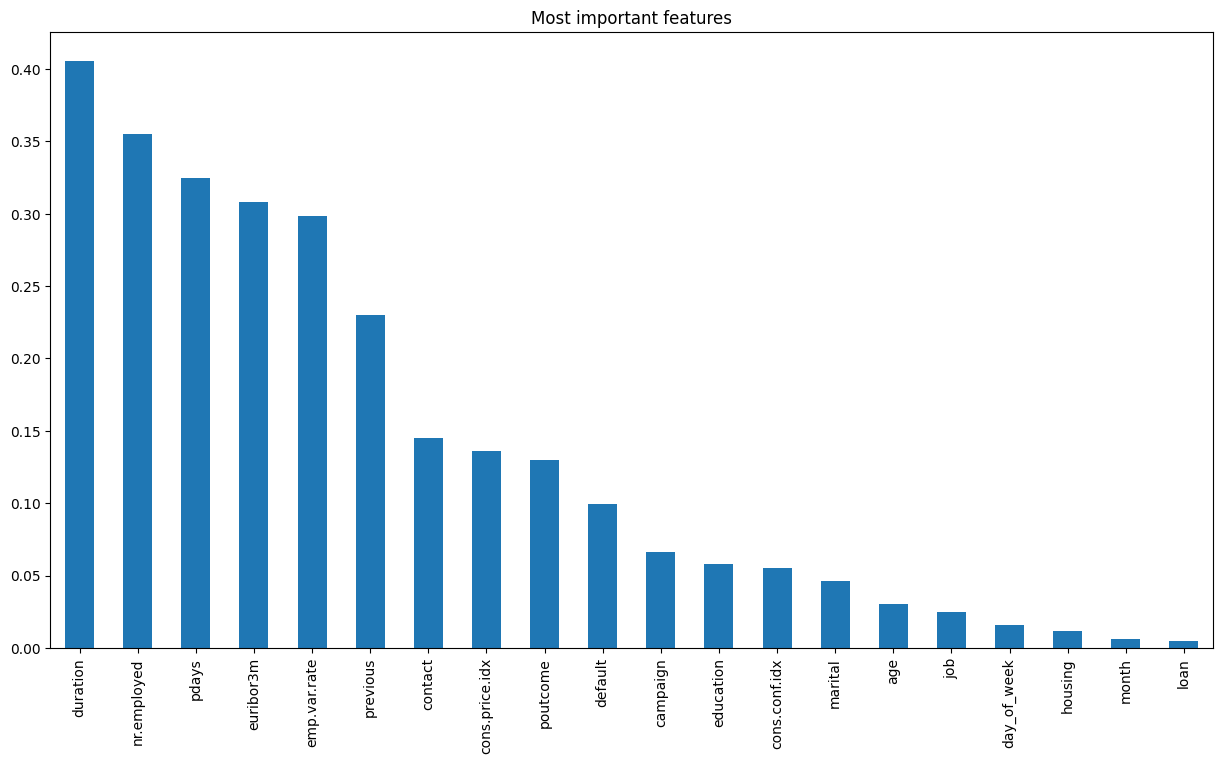

In [11]:
#Check correlations with the target 


plt.figure(figsize=(15,8))
d = df.corr()['target'][:-1].abs().sort_values(ascending=False).plot(kind='bar', title='Most important features')

plt.show()

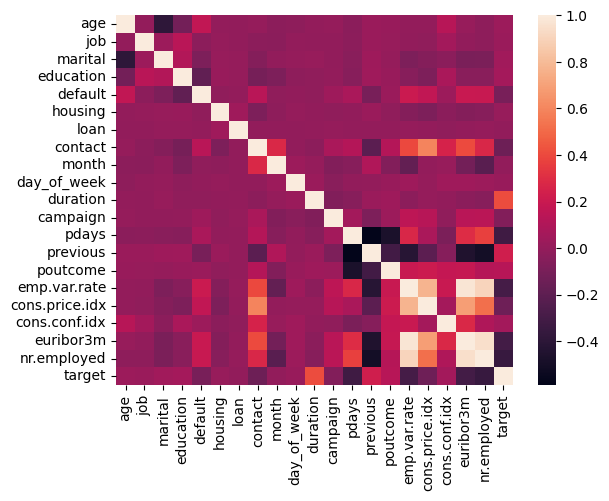

In [12]:
sns.heatmap(df.corr(),annot=False)
plt.show()

In [13]:
#Proportion of the target 

round(df.target.value_counts()/len(df)*100, 2)

0    88.73
1    11.27
Name: target, dtype: float64

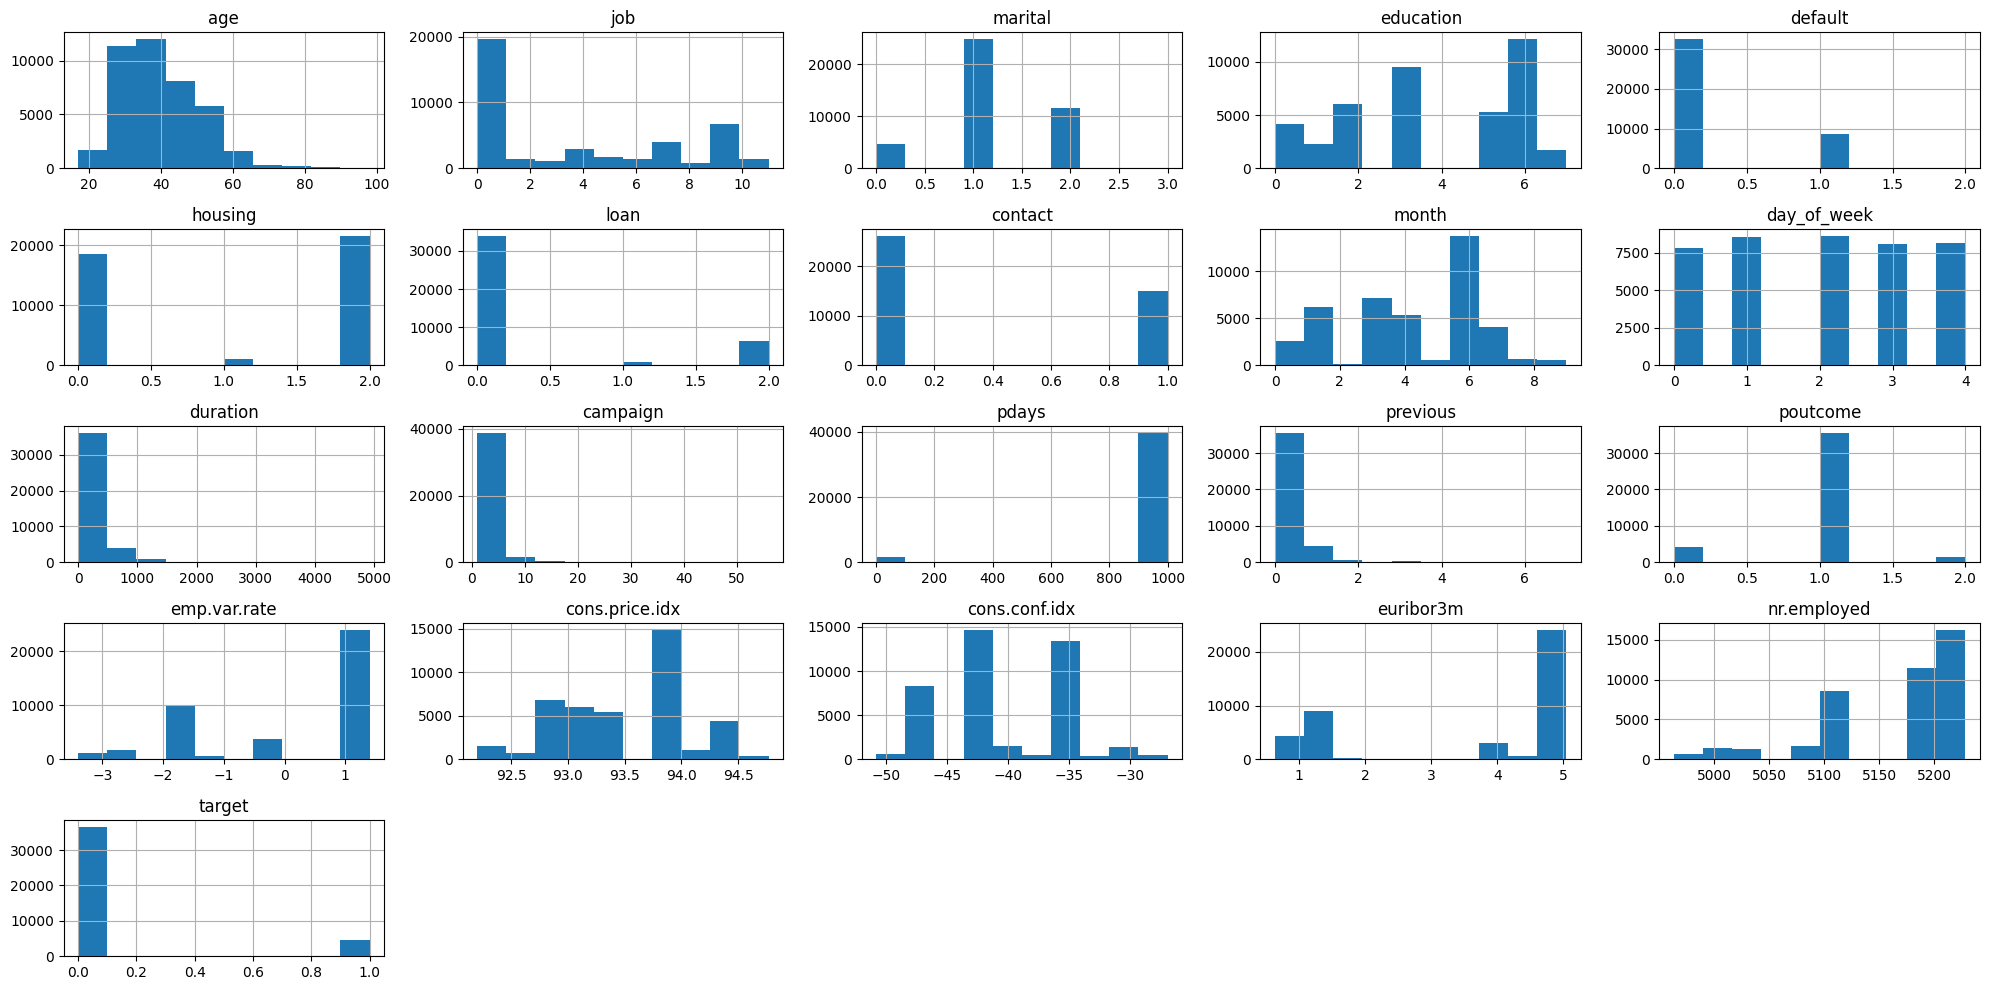

In [14]:
#Let's check the distribution of each variable

df.hist(figsize=(20,10))
plt.tight_layout()

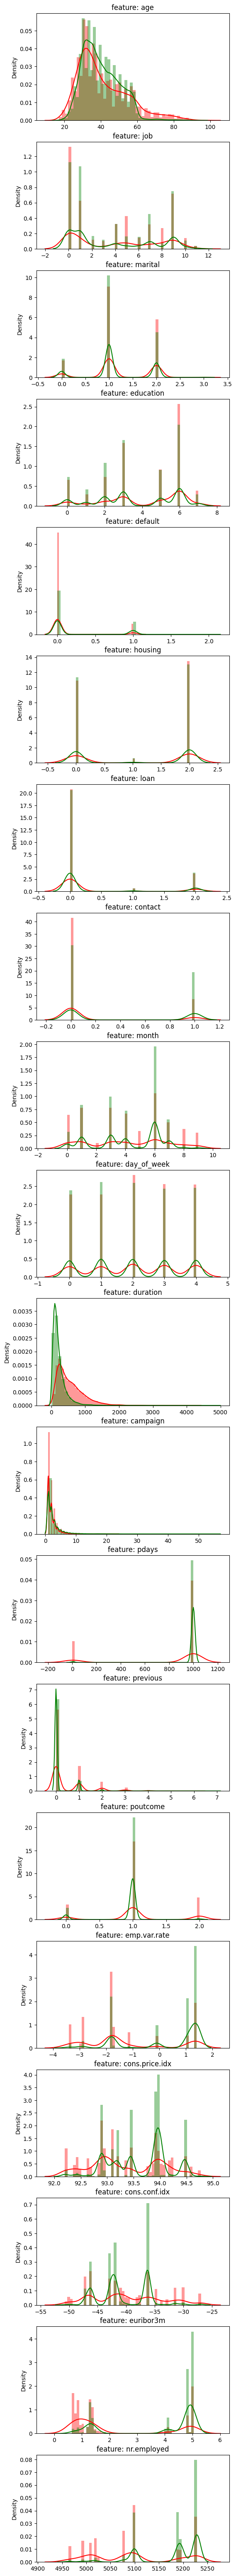

In [15]:
#Now let's check the distribution of each variable plotting the distribution of 0 and 1

import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:20].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.target == 1], bins=50, color='r')
    sns.distplot(df[col][df.target == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

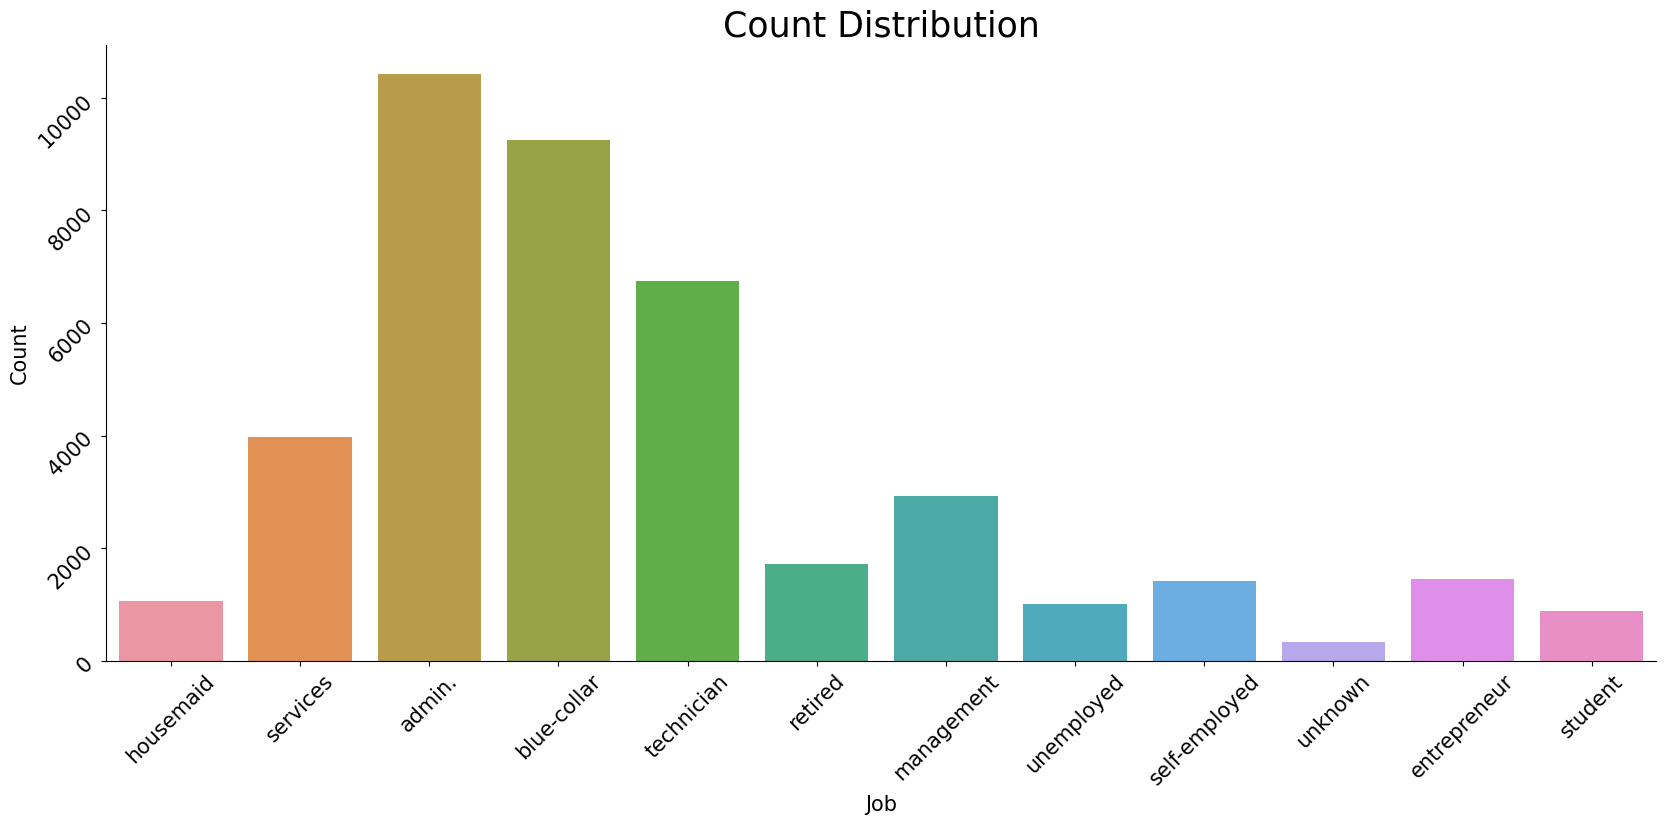

In [16]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df_og)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Count Distribution', fontsize=25)
ax.tick_params(labelsize=15, rotation=45)
sns.despine()

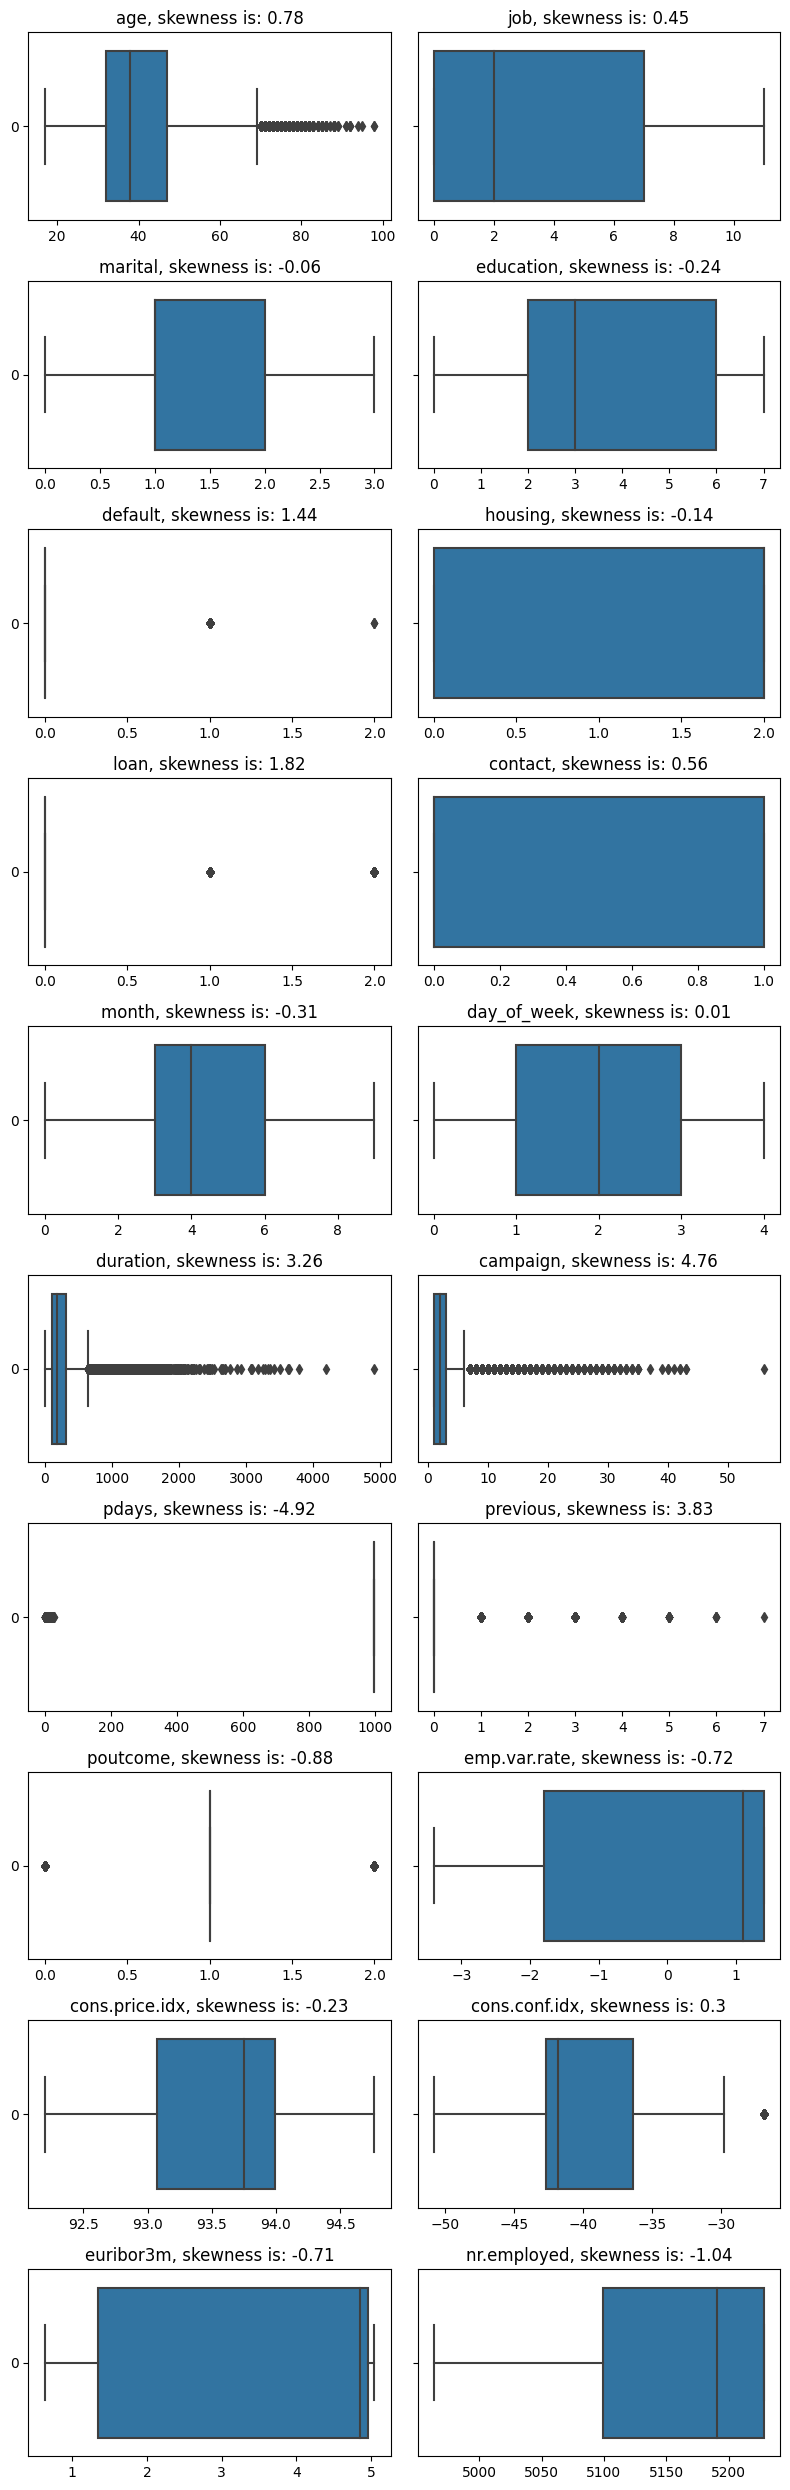

In [17]:
#Box plot all the variables 

numeric_columns = (list(df.loc[:, 'age':'nr.employed']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(8,25))
    fig.suptitle(suptitle,y=1, size=20)
    axs = axs.flatten()
        
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        plt.tight_layout()
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=2, suptitle=' ')




In [18]:
#Split the data 

from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)

y = df['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 101)



In [19]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

k=1 88.86 (+/- 0.51)
k=2 89.92 (+/- 0.54)
k=3 90.04 (+/- 0.48)
k=4 90.49 (+/- 0.48)
k=5 90.62 (+/- 0.46)
k=6 90.67 (+/- 0.48)
k=7 90.79 (+/- 0.39)
k=8 90.81 (+/- 0.37)
k=9 90.99 (+/- 0.37)
k=10 90.91 (+/- 0.45)
k=11 91.06 (+/- 0.44)
k=12 90.99 (+/- 0.41)
k=13 91.13 (+/- 0.44)
k=14 91.09 (+/- 0.48)
k=15 91.17 (+/- 0.45)
k=16 91.18 (+/- 0.48)
k=17 91.24 (+/- 0.44)
k=18 91.24 (+/- 0.44)
k=19 91.29 (+/- 0.45)
k=20 91.31 (+/- 0.40)
k=21 91.33 (+/- 0.40)
k=22 91.31 (+/- 0.38)
k=23 91.34 (+/- 0.38)
k=24 91.32 (+/- 0.43)
k=25 91.35 (+/- 0.41)
k=26 91.28 (+/- 0.40)
k=27 91.33 (+/- 0.38)
k=28 91.31 (+/- 0.39)
k=29 91.38 (+/- 0.35)
k=30 91.38 (+/- 0.41)
k=31 91.41 (+/- 0.39)
k=32 91.34 (+/- 0.40)
k=33 91.38 (+/- 0.38)
k=34 91.33 (+/- 0.41)
k=35 91.40 (+/- 0.36)
k=36 91.36 (+/- 0.41)
k=37 91.37 (+/- 0.36)
k=38 91.36 (+/- 0.43)
k=39 91.33 (+/- 0.39)
k=40 91.30 (+/- 0.44)
k=41 91.36 (+/- 0.41)
k=42 91.31 (+/- 0.39)
k=43 91.30 (+/- 0.40)
k=44 91.24 (+/- 0.45)
k=45 91.26 (+/- 0.36)
k=46 91.26 (+/- 0.3

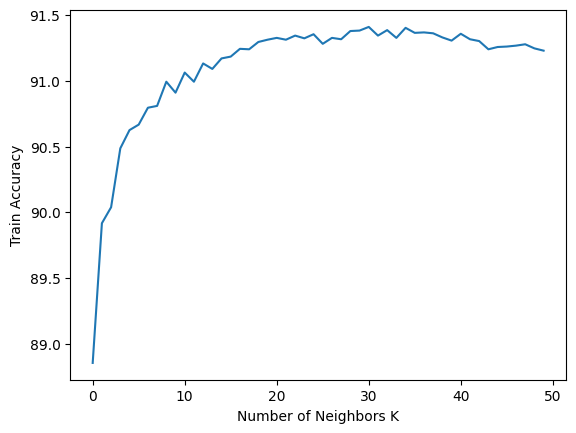

In [25]:
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')

#Neighbors
neighbors = np.arange(0,50)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=123)
    scores = model_selection.cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)

knn_pred_train = knn.predict(x_train)
knn_pred_test = knn.predict(x_test)


In [22]:

KNNCV = (cross_val_score(knn, x_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print('Cross Validation Score:',round((KNNCV), 2)*100)

Cross Validation Score: 91.0


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("   TRAIN")
print(confusion_matrix(y_train, knn_pred_train))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_train, knn_pred_train))
print()



   TRAIN
[[24833   737]
 [ 1605  1656]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     25570
           1       0.69      0.51      0.59      3261

    accuracy                           0.92     28831
   macro avg       0.82      0.74      0.77     28831
weighted avg       0.91      0.92      0.91     28831




In [24]:
print("   TEST")
print(confusion_matrix(y_test, knn_pred_test))
print()
print("--------------------------------------------------------")
print()
print(classification_report(y_test, knn_pred_test))

   TEST
[[10593   385]
 [  750   629]]

--------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10978
           1       0.62      0.46      0.53      1379

    accuracy                           0.91     12357
   macro avg       0.78      0.71      0.74     12357
weighted avg       0.90      0.91      0.90     12357



Now we have to interpret this data:

- False Positive, means the client did NOT SUBSCRIBE, but the model thinks he did.
- False Negative, means the client SUBSCRIBED to term deposit, but the model says he didn't.

For this model, we should focus on reducing the False Positive as much as we can, since these are the clients that could potentially subscribe but the model tells us they already did. It's where the company would lose potential profits. 

For the False Negative, the company might contact clients that already subscribed to the term deposit, it is not ideal, but it is not problematic. The company could possibly cross the data between potential customers and customers that already subscribed to the term deposit to avoid calling them a second time.  